<a href="https://colab.research.google.com/github/thinhngo-x/deep-learning/blob/master/TD4_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import math
import numpy as np

In [0]:
import torch
from torch.utils import data

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, coords, labels):
        'Initialization'
        self.labels = labels
        self.coords = coords

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.coords)

  def __getitem__(self, index):
        'Generates one sample of data'

        # Load data and get label
        X = self.coords[index]
        y = self.labels[index]

        return X, y

<class 'torch.Tensor'>


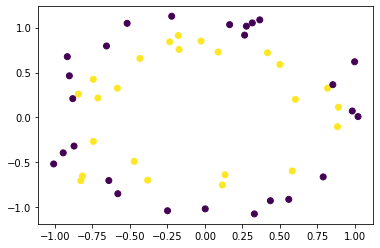

In [0]:
X,y = make_circles(100, noise=0.1)
training_size = int(100 * 0.5)
dataset = TensorDataset(torch.tensor(X),torch.tensor(y))
train_data = dataset[0:training_size]
test_data = dataset[(training_size+1):100]
X_train, y_train = train_data
X_test, y_test = test_data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
print(type(X_train))

In [0]:
train_data = Dataset(X_train.float(), y_train.float())
test_data = Dataset(X_test.float(), y_test.float())

In [0]:
net2 = nn.Sequential(nn.Linear(2, 500),
                     nn.Sigmoid(),
                     nn.Linear(500,1),
                     nn.Sigmoid())

In [0]:
def trainer(dataset,test_data,model,loss_fn,epoch=1000,batch_size=1,rate=1e-4):
  loss_eval = list()
  error_eval = list()
  dataset = data.DataLoader(dataset, batch_size)
  test_loader = data.DataLoader(test_data, batch_size=len(test_data))
  X_test, y_test = iter(test_loader).next()
  optimizer = optim.Adam(model.parameters(),lr=rate)
  j = 0
  for i in tqdm(range(epoch)):
    for imgs, labels in dataset:
      j += 1
      imgs = imgs
      labels = labels
      optimizer.zero_grad()
      labels = labels.float()
      output = model(imgs)
      loss = loss_fn(output, labels)
      if(j%10 == 0):
        loss_eval.append(loss.item())
        error_eval.append(loss_fn(model(X_test), y_test).item())
      loss.backward()

      optimizer.step()
  return loss_eval, error_eval

In [0]:
loss1, error1 = trainer(train_data, test_data, net2, nn.BCELoss(), epoch=1000, rate=5e-3, batch_size=len(train_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


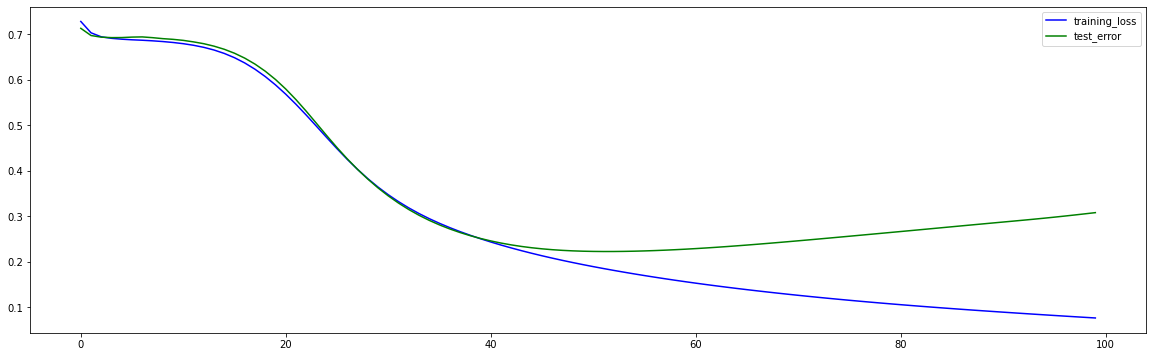

In [0]:
def graph(**kwargs):
  colors = "bgrcmykw:"
  fig, ax = plt.subplots(figsize = (20,6))
  
  for name,color in zip(kwargs,colors):
    ax.plot(kwargs[name],color,label=name)
  ax.legend()
  plt.show()


graph(training_loss = loss1, test_error = error1)

In [0]:
net3 = nn.Sequential(nn.Linear(2, 500),
                     nn.Dropout(),
                     nn.Sigmoid(),
                     nn.Dropout(),
                     nn.Linear(500,1),
                     nn.Sigmoid())

In [0]:
loss2, error2 = trainer(train_data, test_data, net3, nn.BCELoss(), epoch=1000, rate=5e-3, batch_size=len(train_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


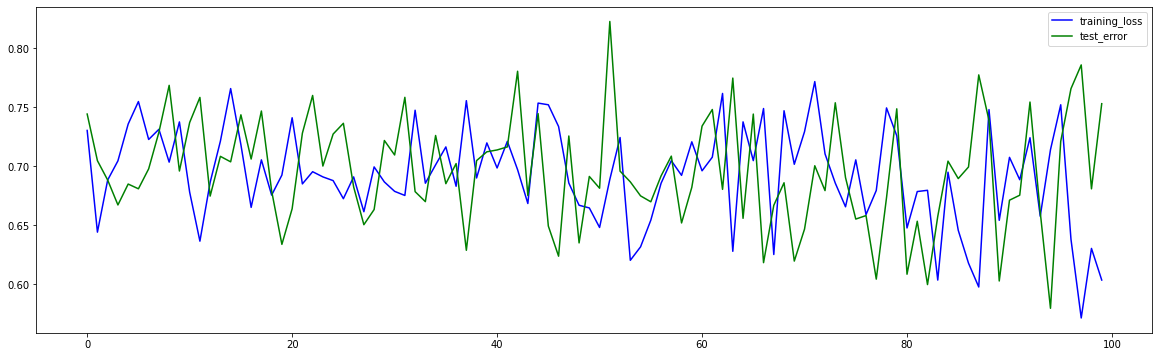

In [0]:
graph(training_loss = loss2, test_error = error2)

In [0]:
def RandomRotation(point):
  phi = np.random.random()
  phi = phi * 2 * 3.14
  rot = torch.Tensor([[np.cos(phi), -np.sin(phi)],
                      [np.sin(phi),  np.cos(phi)]])
  return torch.matmul(point, torch.t(rot))

def augment(train_data, rate=2):
  data_loader = data.DataLoader(train_data)
  X_train = list() 
  y_train = list()
  for x,y in data_loader:
    X_train.append(x)
    y_train.append(y)
    for i in range(rate-1):
      X_train.append(RandomRotation(x))
      y_train.append(y)
  return Dataset(X_train, y_train)

In [0]:
augmented_train_data = augment(train_data, )

In [0]:
loss3, error3 = trainer(augmented_train_data, test_data, net3, nn.BCELoss(), epoch=1000, rate=5e-3, batch_size=len(augmented_train_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


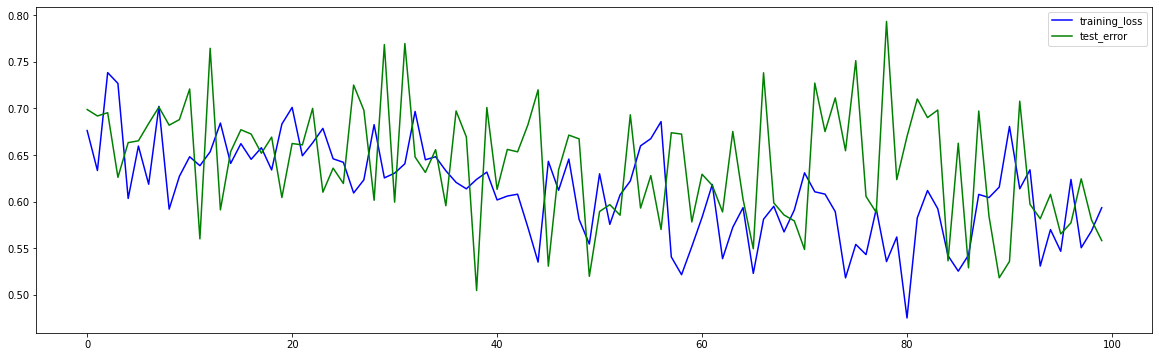

In [0]:
graph(training_loss = loss3, test_error = error3)